<a href="https://colab.research.google.com/github/likeshd/time_series_models_libraries/blob/main/PA_emission_location_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install darts
import pandas as pd
from darts import TimeSeries
from darts.models import ExponentialSmoothing, ARIMA, Prophet, RNNModel
from darts.metrics import mae
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 917.3/917.3 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 50.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.6/134.6 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.3/812.3 kB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.7/196.7 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 11.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-non

In [2]:
data = pd.read_csv('/content/export_public_KPIMain_2024_07_12_12_47_07_090.csv')
# data.head(5)
# Select the necessary columns
data1 = data[["month", "year", "address_id", "kpi_em_Total_Emission"]]

# Create the 'actual_date' column by directly using the year and month columns
data1['actual_date'] = pd.to_datetime(data1.assign(day=1)[['year', 'month', 'day']])

# Sort the DataFrame by 'actual_date' in ascending order
data1.sort_values(by='actual_date', inplace=True)

<ipython-input-2-45c1ba61419a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['actual_date'] = pd.to_datetime(data1.assign(day=1)[['year', 'month', 'day']])
<ipython-input-2-45c1ba61419a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.sort_values(by='actual_date', inplace=True)


In [26]:
from darts.models import ExponentialSmoothing


In [27]:
#Monthly
def monthly_analysis(model,series, test_series,address_id):
  forecast_horizon_months = 6
  monthly_prediction = model.predict((len(test_series)) + forecast_horizon_months)
  monthly_p = monthly_prediction[(len(test_series)):]
  monthly_p_plot = monthly_prediction[(len(test_series)) - 1:]
  print(f"Monthly Forecast for location = {address_id} is {monthly_p}" )
  # Monthly Plot
  plt.figure()
  series.plot(label='Original Data')
  monthly_p_plot.plot(label='Monthly Prediction')
  plt.title('Monthly Forecast')
  plt.legend()
  plt.show()


In [28]:
# Quarterly Forecast
def quarterly_analysis(model,series, test_series,address_id):
  forecast_horizon_quarters = 4  # 4 quarters in a year
  quarterly_prediction = model.predict((len(test_series)) + (forecast_horizon_quarters * 3))
  quarterly_p = quarterly_prediction[(len(test_series)):]
  quarterly_p = quarterly_p.pd_dataframe().resample('Q').mean()  # Resampling to quarterly
  quarterly_p_plot = quarterly_prediction[(len(test_series)) - 1:]
  quarterly_p_plot = quarterly_p_plot.pd_dataframe().resample('Q').mean()  # Resampling to quarterly
  # Resample the original series for quarterly
  quarterly_series = series.pd_dataframe().resample('Q').mean()
  print(f"Quarterly Forecast for location = {address_id} is {quarterly_p}")
  # Quarterly Plot
  plt.figure()
  plt.plot(quarterly_series.index, quarterly_series, label='Original Data')
  plt.plot(quarterly_p_plot.index, quarterly_p_plot, label='Quarterly Prediction')
  plt.title('Quarterly Forecast')
  plt.legend()
  plt.show()


In [29]:
def yearly_analysis(model,series, test_series,address_id):
  # Yearly Forecast
  forecast_horizon_years = 1  # 1 year
  yearly_prediction = model.predict((len(test_series)) + (forecast_horizon_years * 12))
  yearly_p = yearly_prediction[(len(test_series)):]
  yearly_p = yearly_p.pd_dataframe().resample('Y').mean()  # Resampling to yearly
  yearly_p_plot = yearly_prediction[(len(test_series)) - 1:]
  yearly_p_plot = yearly_p_plot.pd_dataframe().resample('Y').mean()  # Resampling to yearly
  print(f"Yearly Forecast for location = {address_id} is {yearly_p}")
  # Resample the original series for yearly data
  yearly_series = series.pd_dataframe().resample('Y').mean()
  # Yearly Plot
  plt.figure()
  plt.plot(yearly_series.index, yearly_series, label='Original Data')
  plt.plot(yearly_p_plot.index, yearly_p_plot, label='Yearly Prediction')
  plt.title('Yearly Forecast')
  plt.legend()
  plt.show()


In [30]:
def series_analysis(address_id, df):
  series = TimeSeries.from_dataframe(df, 'actual_date', 'kpi_em_Total_Emission')
  # Define the split ratio
  train_ratio = 0.8

  # Calculate the split point
  split_point = int(len(series) * train_ratio)

  # Split the data into training and testing sets
  train_series, test_series = series.split_before(split_point)
  model = ExponentialSmoothing(seasonal_periods=9)
  model.fit(train_series)
  #Analysis
  monthly_analysis(model,series, test_series,address_id)
  quarterly_analysis(model,series, test_series,address_id)
  yearly_analysis(model,series, test_series,address_id)


Monthly Forecast for location = '86a1eb45-f829-49ad-811c-4129f9e88083' is <TimeSeries (DataArray) (actual_date: 6, component: 1, sample: 1)>
array([[[-6.03601983]],

       [[19.10142566]],

       [[18.28428687]],

       [[26.82051639]],

       [[20.93558031]],

       [[18.32970564]]])
Coordinates:
  * actual_date  (actual_date) datetime64[ns] 2024-01-01 ... 2024-06-01
  * component    (component) object 'kpi_em_Total_Emission'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None


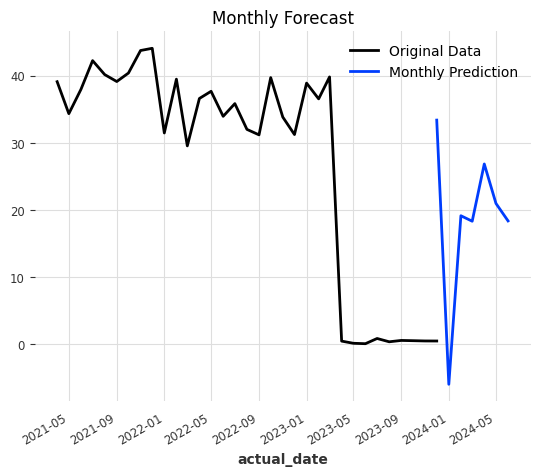

Quarterly Forecast for location = '86a1eb45-f829-49ad-811c-4129f9e88083' is component    kpi_em_Total_Emission
actual_date                       
2024-03-31               10.449898
2024-06-30               22.028601
2024-09-30               25.526899
2024-12-31                4.010440


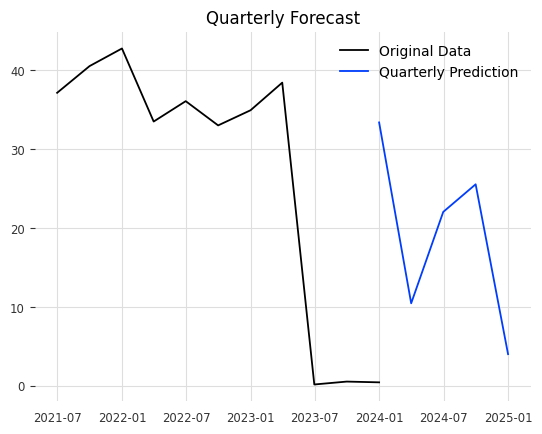

Yearly Forecast for location = '86a1eb45-f829-49ad-811c-4129f9e88083' is component    kpi_em_Total_Emission
actual_date                       
2024-12-31               15.503959


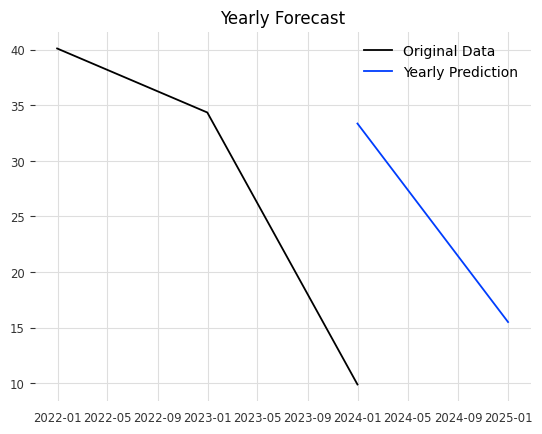

Monthly Forecast for location = 'ad2d4e45-f9e6-436a-b609-15af33c4a9f3' is <TimeSeries (DataArray) (actual_date: 6, component: 1, sample: 1)>
array([[[30.88060554]],

       [[30.29478346]],

       [[31.49583074]],

       [[32.68187175]],

       [[35.50460389]],

       [[34.27659836]]])
Coordinates:
  * actual_date  (actual_date) datetime64[ns] 2023-04-01 ... 2023-09-01
  * component    (component) object 'kpi_em_Total_Emission'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None


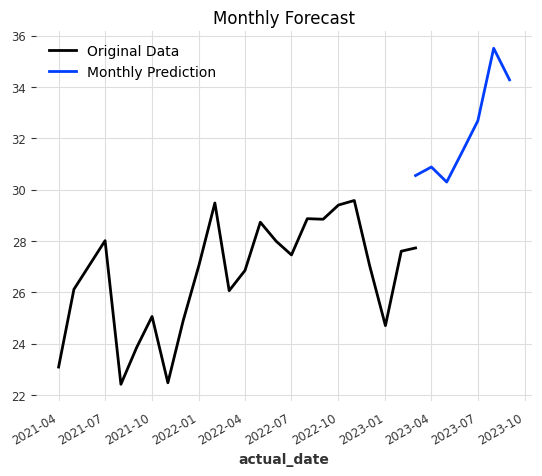

Quarterly Forecast for location = 'ad2d4e45-f9e6-436a-b609-15af33c4a9f3' is component    kpi_em_Total_Emission
actual_date                       
2023-06-30               30.890407
2023-09-30               34.154358
2023-12-31               34.015109
2024-03-31               33.972673


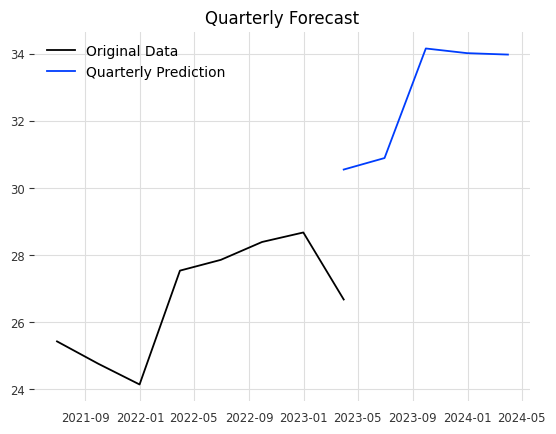

Yearly Forecast for location = 'ad2d4e45-f9e6-436a-b609-15af33c4a9f3' is component    kpi_em_Total_Emission
actual_date                       
2023-12-31               33.019958
2024-12-31               33.972673


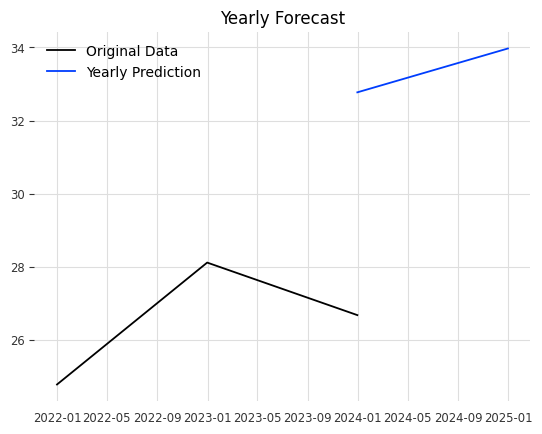

Monthly Forecast for location = '116ba910-145e-4c93-94ed-182370536ddf' is <TimeSeries (DataArray) (actual_date: 6, component: 1, sample: 1)>
array([[[39.89111023]],

       [[41.74498158]],

       [[41.89917309]],

       [[96.70612119]],

       [[43.89940687]],

       [[45.43587494]]])
Coordinates:
  * actual_date  (actual_date) datetime64[ns] 2023-07-01 ... 2023-12-01
  * component    (component) object 'kpi_em_Total_Emission'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None


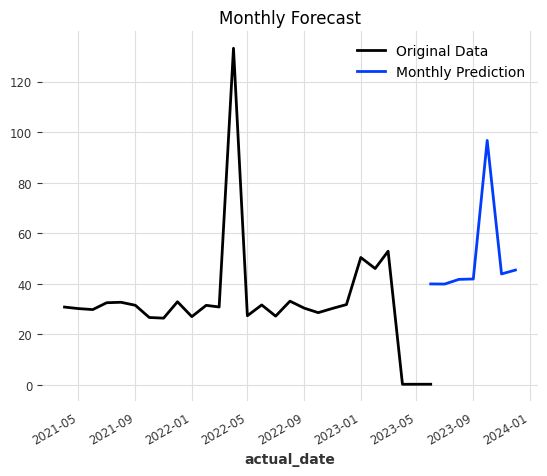

Quarterly Forecast for location = '116ba910-145e-4c93-94ed-182370536ddf' is component    kpi_em_Total_Emission
actual_date                       
2023-09-30               41.178422
2023-12-31               62.013801
2024-03-31               43.316984
2024-06-30               46.727690


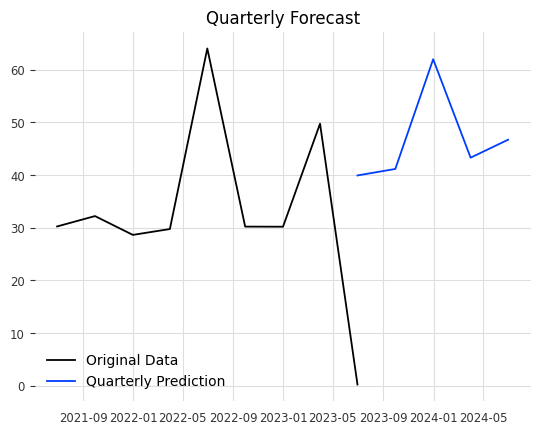

Yearly Forecast for location = '116ba910-145e-4c93-94ed-182370536ddf' is component    kpi_em_Total_Emission
actual_date                       
2023-12-31               51.596111
2024-12-31               45.022337


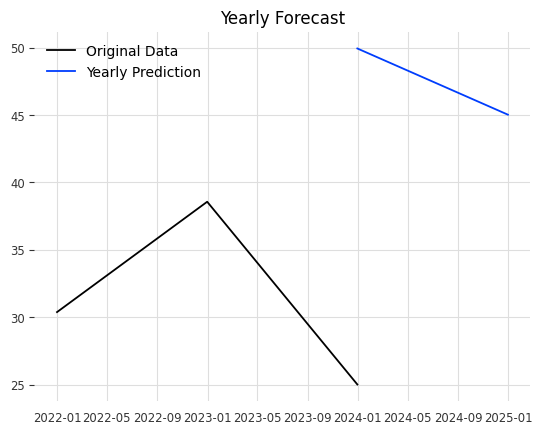

In [32]:
# Get unique address_ids
unique_address_ids = data1["address_id"].unique()
# print(unique_address_ids)
# Create a list of DataFrames for each unique address_id
for address_id in unique_address_ids:
    df = data1[data1['address_id'] == address_id].reset_index(drop=True)
    # print(df)
    series_analysis(address_id,df)
